<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> User Session </h1>
        <a href="https://masters.em-lyon.com/en/msc-in-digital-marketing-data-science">[Emlyon]</a> MSc in Digital Marketing & Data Science (DMDS) <br/>
         September 2023, Paris | © Saeed VARASTEH [RP] | Jean SAVINIEN
    </span>
</div>

<div class="alert-info"> You can download the data you need for this exercise here: <a href="https://www.dropbox.com/scl/fi/bdh8iiq7tg1m7zl881mrl/session.zip?rlkey=z9rv16b9zw94eyukm4jsoxzey&dl=0"> Session Data </a> </div>

#### Dataset description

You will be given two files: __session_clicks.csv__ and __session-buys.csv__.

The __session_clicks.csv__ file consists of the clicks made by the users on the items during a session.

Each line of the file has the following format `Session ID`, `Timestamp`, `Item ID`, and `Category`

- `Session ID`: the unique identifier of the session. A session can have one or more clicks.

- `Timestamp`: the date and time when the click occurred. Format of YYYY-MM-DD hh:mm:ss.

- `Item ID`: the unique identifier of the clicked item.

- `Category`: the context of the click. A number from 0 to 14.
    - 0 indicates missing values, a number between 1 and 12 is a category identifier (e.g. sports), 13 indicates a special offer and 14 represents all other brands.

The file __session-buys.csv__ consists of the buy events.

Each line of the file has the following format `Session ID`, `Timestamp`, `Item ID`, `Price`, and `Quantity`

- `Price`: the price of the purchased item.

- `Quantity`: the buy quantity.

__Your Task__

Read the datasets and explore the data, create visualisations and look for patterns.

You are not given a specific task to do! You are the data analyst, extract as much information as you can from these files based on what you have learned in class. Use Pandas functions, visualisation, etc.

Comment/document everything.

Here are some steps you can follow to get started:

- Read the datasets into two separate dataframes: __clicks__ and __buys__.
- Check for missing values.
- Check column data types.
- Convert the `ts` column to a datetime column.
- Use the `ts` column to create some time-based columns such as: `year`, `month`, `day`, `hour`, `week` and `weekday`.
- Describe all numerical columns.

And here are some questions you can answer: (Add as many questions as you like to this list and try to answer them)

- What is the average number of clicks/purchases per hour?
- What time of day do people tend to visit/buy more?
- What is the average number of clicks/purchases per day of the week in the datasets?
- What day of the week do people tend to visit/buy more items?
- How many sessions are there per category?
- How long is the longest session?
- What items were sold in the longest session? When did this happen?
- Do longer sessions result in more purchases?
- Is there a relationship between session length and number of purchases?
- What are the most popular (most sold) items?


- What general marketing strategies (in terms of sending promotional emails, site advertising or personalised recommendations) can you think of for this online retailer?

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd

In [2]:
clicks = pd.read_csv('session/session_clicks.csv') 
print("clicks dataset shape",clicks.shape)
clicks.sample(5)

clicks dataset shape (33003944, 4)


,sessionID,ts,itemID,cat
11853364,3603304,2014-05-28 08:06:46.209000+00:00,214820259,0
22875014,7465891,2014-08-09 09:15:31.270000+00:00,214678029,13
32383270,11525301,2014-09-23 07:34:12.033000+00:00,214744091,13
2683439,894943,2014-04-11 08:22:58.449000+00:00,214718246,0
32746890,11339678,2014-09-28 10:09:41.893000+00:00,214857596,13


In [3]:
buys = pd.read_csv('session/session_buys.csv')
print("buys dataset shape",buys.shape)
buys.head()

buys dataset shape (1150753, 5)


,sessionID,ts,itemID,price,cnt
0,420374,2014-04-06 18:44:58.314000+00:00,214537888,12462,1
1,420374,2014-04-06 18:44:58.325000+00:00,214537850,10471,1
2,281626,2014-04-06 09:40:13.032000+00:00,214535653,1883,1
3,420368,2014-04-04 06:13:28.848000+00:00,214530572,6073,1
4,420368,2014-04-04 06:13:28.858000+00:00,214835025,2617,1


#### check missing values and column data types

In [4]:
 clicks.info(show_counts = True) # none of 4 columns has missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33003944 entries, 0 to 33003943
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype 
---  ------     --------------     ----- 
 0   sessionID  33003944 non-null  int64 
 1   ts         33003944 non-null  object
 2   itemID     33003944 non-null  int64 
 3   cat        33003944 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1007.2+ MB


In [6]:
clicks.isna().sum() # none of 4 columns has missing values.

sessionID    0
ts           0
itemID       0
cat          0
dtype: int64

In [112]:
buys.info() # none of 5 columns has missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150753 entries, 0 to 1150752
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sessionID  1150753 non-null  int64 
 1   ts         1150753 non-null  object
 2   itemID     1150753 non-null  int64 
 3   price      1150753 non-null  int64 
 4   cnt        1150753 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 43.9+ MB


In [113]:
buys.loc[buys.isna().any(axis = 1)] # no missing values 

,sessionID,ts,itemID,price,cnt


#### Convert the ts column to a datetime column

In [114]:
buys['ts'] = buys['ts'].str[:19]
buys['ts'] = pd.to_datetime(buys['ts'])
buys['ts'].dtypes

dtype('<M8[ns]')

In [115]:
clicks['ts'] = clicks['ts'].str[:19]
clicks['ts'] = pd.to_datetime(clicks['ts'])
clicks['ts'].dtypes

dtype('<M8[ns]')

#### Use the ts column to create some time-based columns such as: year, month, day, hour, week and weekday

In [116]:
import datetime as dt

clicks['year'] = clicks['ts'].dt.year
clicks['month'] = clicks['ts'].dt.month
clicks['day'] = clicks['ts'].dt.day
clicks['hour'] = clicks['ts'].dt.hour
clicks['week'] = clicks['ts'].dt.isocalendar().week
clicks['weekday'] = clicks['ts'].dt.weekday

In [117]:
buys['year'] = buys['ts'].dt.year
buys['month'] = buys['ts'].dt.month
buys['day'] = buys['ts'].dt.day
buys['hour'] = buys['ts'].dt.hour
buys['week'] = buys['ts'].dt.isocalendar().week
buys['weekday'] = buys['ts'].dt.weekday

#### Describe all numerical columns

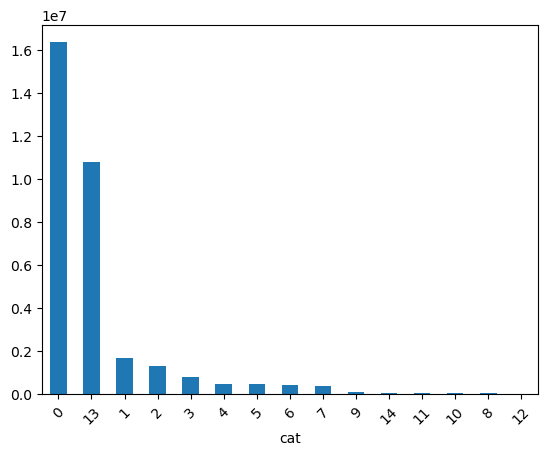

In [118]:
clicks['cat'].value_counts().plot(kind = 'bar', rot = 45);

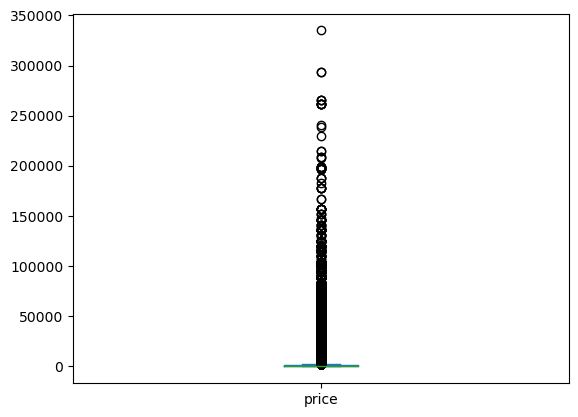

In [119]:
buys['price'].plot(kind = 'box');

---

#### What is the average number of clicks/purchases per hour?

In [120]:
df_clicks = clicks.groupby(['year', 'month', 'day','hour']).size().reset_index(name = 'clicks_counts')
clicks_per_hour = df_clicks['clicks_counts'].mean().round()
clicks_per_hour # clicks per hour is 7556

7556.0

In [121]:
df_buys = buys.groupby(['year', 'month', 'day','hour']).size().reset_index(name = 'purchases_counts')
purchases_per_hour = df_buys['purchases_counts'].mean().round()
purchases_per_hour # purchases per hour is 274

274.0

#### What time of day do people tend to visit/buy more?

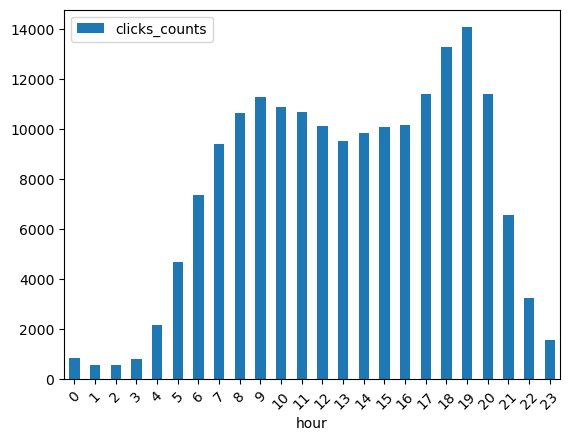

In [122]:
df_clicks.groupby(['hour'])[['clicks_counts']].mean().plot(kind = 'bar', rot = 45);
# according to the figure below, around 9h and 19h, people tend to click more

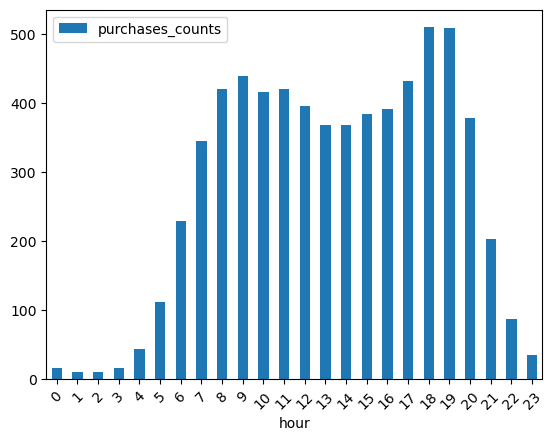

In [123]:
df_buys.groupby(['hour'])[['purchases_counts']].mean().plot(kind = 'bar', rot = 45);
# according to the photo, around 9h and 19h, people tend to buy more, same as the time people tend to click more.

#### What is the average number of clicks/purchases per day of the week in the datasets?

In [124]:
df_clicks_weekday = clicks.groupby(['year','week','weekday']).size().reset_index(name = 'clicks_counts')
df_clicks_weekday.groupby(['year','week'])['clicks_counts'].mean().round().reset_index(name = 'avg_click_per_day')

,year,week,avg_click_per_day
0,2014,14,219258.0
1,2014,15,198986.0
2,2014,16,164163.0
3,2014,17,217900.0
4,2014,18,188808.0
5,2014,19,165667.0
6,2014,20,206830.0
7,2014,21,184110.0
8,2014,22,176373.0
9,2014,23,164948.0


In [125]:
df_buys_weekday = buys.groupby(['year','week','weekday']).size().reset_index(name = 'buys_counts')
df_buys_weekday.groupby(['year','week'])['buys_counts'].mean().round().reset_index(name = 'avg_buys_per_day')

,year,week,avg_buys_per_day
0,2014,14,7071.0
1,2014,15,6331.0
2,2014,16,4680.0
3,2014,17,6432.0
4,2014,18,5110.0
5,2014,19,6047.0
6,2014,20,8069.0
7,2014,21,4784.0
8,2014,22,5457.0
9,2014,23,4612.0


#### What day of the week do people tend to visit/buy more items?

<Axes: xlabel='weekday'>

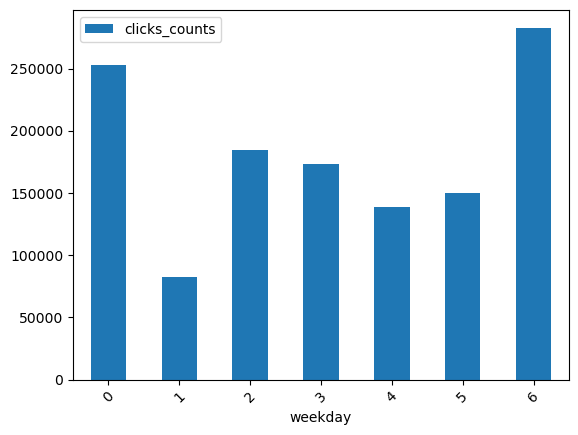

In [126]:
df_clicks_weekday.groupby(['weekday'])[['clicks_counts']].mean().round().plot(kind = 'bar', rot = 45)
# on saturday and sunday people tend to vistit more items.

<Axes: xlabel='weekday'>

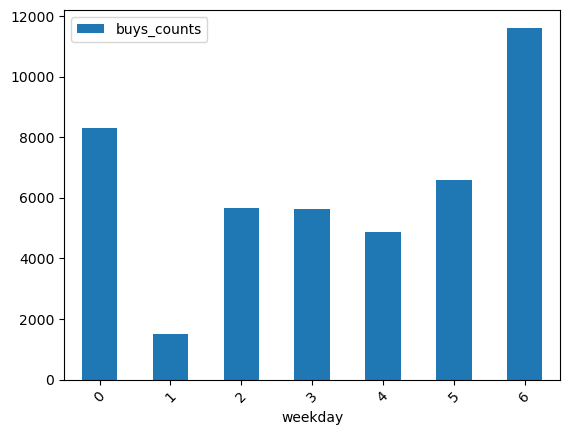

In [127]:
df_buys_weekday.groupby(['weekday'])[['buys_counts']].mean().round().plot(kind = 'bar', rot = 45)
# same as clicks, people tend to buy more on Saturday and sunday.

#### How many sessions are there per category?

In [128]:
clicks.drop_duplicates(['cat','sessionID']).groupby('cat')[['sessionID']].count()

,sessionID
cat,
0,4599577
1,597856
2,511124
3,270914
4,177484
5,208998
6,173917
7,157767
8,17173


#### How long is the longest session?

In [129]:
clicks['cnt']=0
a = clicks[['sessionID','ts','cnt']]
b = buys[['sessionID','ts','cnt']]
combined_data = pd.concat([a,b], ignore_index = True).groupby('sessionID').agg({'ts':['max','min'], 'cnt':'sum'})
combined_data['duration'] = combined_data[( 'ts', 'max')] - combined_data[( 'ts', 'min')]
combined_data.sort_values('duration', ascending = False).iloc[0]
# The longest session is 2 days 20:18:58

ts        max    2014-09-04 23:30:29
          min    2014-09-02 03:11:31
cnt       sum                      0
duration             2 days 20:18:58
Name: 10145339, dtype: object

#### What items were sold in the longest session? When did this happen?

In [130]:
# during the longest session, nothing is sold, as cnt=0.
# But if you want to find the longest session where something is sold, the code is below.
combined_data.columns = ['_'.join(col).strip() for col in combined_data.columns.values]
combined_data.query('cnt_sum > 0').sort_values(by = 'duration_', ascending = False).iloc[1]
# the longest sessionID is 10504069, duration is 0 days 06:02:40

ts_max       2014-09-10 18:47:05
ts_min       2014-09-10 12:44:25
cnt_sum                       14
duration_        0 days 06:02:40
Name: 10504069, dtype: object

In [105]:
buys[buys['sessionID'] == 10504069]
# It happened at 2014-09-10 17:58:46, as showed the result 13 items were sold.

,sessionID,ts,itemID,price,cnt,year,month,day,hour,week,weekday
1010857,10504069,2014-09-10 17:58:46,214716945,2093,1,2014,9,10,17,37,2
1010858,10504069,2014-09-10 17:58:46,214554862,2093,1,2014,9,10,17,37,2
1010859,10504069,2014-09-10 17:58:46,214855016,1046,1,2014,9,10,17,37,2
1010860,10504069,2014-09-10 17:58:46,214567404,1046,1,2014,9,10,17,37,2
1010861,10504069,2014-09-10 17:58:46,214844405,1989,1,2014,9,10,17,37,2
1010862,10504069,2014-09-10 17:58:46,214848898,37594,1,2014,9,10,17,37,2
1010863,10504069,2014-09-10 17:58:46,214848977,1779,1,2014,9,10,17,37,2
1010864,10504069,2014-09-10 17:58:46,214829790,680,2,2014,9,10,17,37,2
1010865,10504069,2014-09-10 17:58:46,214850949,1360,1,2014,9,10,17,37,2
1010866,10504069,2014-09-10 17:58:46,214853100,1674,1,2014,9,10,17,37,2


#### Do longer sessions result in more purchases?

<Axes: xlabel='duration_', ylabel='cnt_sum'>

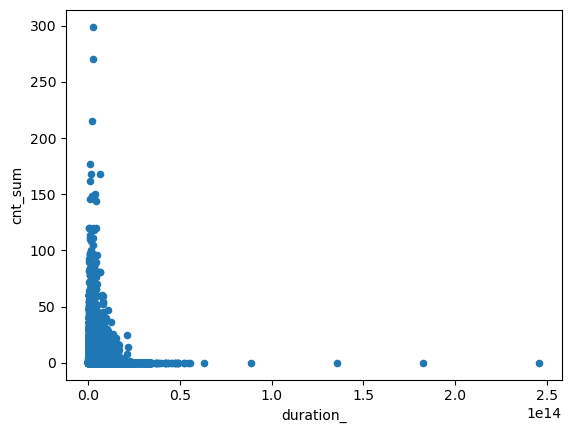

In [135]:
combined_data.plot(kind = 'scatter', x= 'duration_', y = 'cnt_sum' )
# According to the result, longer sessions does not result in more purchases.

#### Is there a relationship between session length and number of purchases?

In [136]:
combined_data[['duration_', 'cnt_sum']].corr()
# the coefience is 0.138, so there is no evidence that they have a relationship.

,duration_,cnt_sum
duration_,1.000000,0.138236
cnt_sum,0.138236,1.000000


#### What are the most popular (most sold) items?

In [143]:
buys.groupby('itemID')['cnt'].sum().reset_index(name = 'cnt_total').sort_values('cnt_total', ascending = False).iloc[0]
# the most sold item is 214853420, 10226 were sold.

itemID       214853420
cnt_total        10226
Name: 18405, dtype: int64

#### What general marketing strategies (in terms of sending promotional emails, site advertising or personalised recommendations) can you think of for this online retailer?

In [148]:
convertion_rate = round(buys['sessionID'].unique().size/clicks['sessionID'].unique().size*100, 2)
print(convertion_rate)
# The convertion rate is only 5.51%, this is very high and suspicious. we need to check the buys data set.

buys['cnt'].value_counts()
# There are 610030 rows where cnt = 0, we need to remove these.

buy_size = buys.query('cnt != 0')['sessionID'].unique().size
real_conversion_rate = round(buy_size/clicks['sessionID'].unique().size*100, 2)
print(real_conversion_rate)
# The real conversion rate is 2.53%, we could personalise recommandation to target more precise the clients.

5.51
2.53


In [169]:
# find convertion rate for each item
a = clicks['itemID'].value_counts().reset_index(name = 'clicks_num')
b = buys.groupby(['itemID'])['cnt'].sum().reset_index(name = 'buys_num')
merge_table = pd.merge(a,b, on = 'itemID', how = 'left')
merge_table['convertion_rate'] = merge_table['buys_num']/merge_table['clicks_num']
merge_table.sort_values('convertion_rate', ascending = False)
merge_table.head(5)
# could put high convertion rate items at obvious place on website, give more traffic.

,itemID,clicks_num,buys_num,convertion_rate
0,643078800,147419,0.0,0.000000
1,214853094,125690,3589.0,0.028554
2,214829878,113488,768.0,0.006767
3,214853420,78448,10226.0,0.130354
4,214826610,69710,2594.0,0.037211


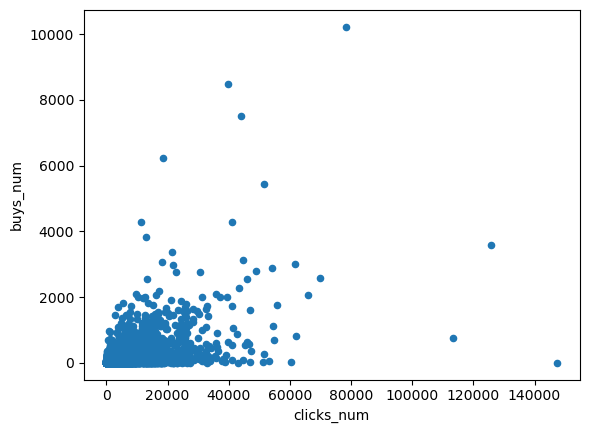

In [170]:
# find the popular items :high clicks numbers and high buy numbers. 
merge_table.plot(kind = 'scatter', x= 'clicks_num', y = 'buys_num');
# Put these items on obvious place to attract attention and traffic.

In [171]:
# find high clicks but no convertion items
merge_table.query('buys_num.isna()').sort_values('clicks_num', ascending = False).head(20)
# check those items and give them less traffic or remove them.

,itemID,clicks_num,buys_num,convertion_rate
501,643078783,12910,NaN,NaN
1008,214601177,7820,NaN,NaN
2000,214551581,4003,NaN,NaN
2123,214842324,3667,NaN,NaN
2136,214650506,3633,NaN,NaN
2140,214553593,3623,NaN,NaN
2148,214835282,3604,NaN,NaN
2160,214836782,3579,NaN,NaN
2170,214556270,3550,NaN,NaN
2436,214685805,3065,NaN,NaN


In [172]:
# find the 20 item which generate the biggest revenue
buys.groupby('itemID').agg({'cnt': 'sum', 'price':'sum'}).sort_values('price', ascending = False).head(20)
# give these high items more traffic.

,cnt,price
itemID,,
214853072,1560,24097314
214840762,639,18260625
214854707,1182,17693904
214853094,3589,14750136
214650508,204,14660954
214701787,1073,13127172
214859139,589,11147003
214833800,385,11030918
214510445,1328,10840334
